In [34]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from src.path_loss import PathLossInHIndoorOfficeLOS, \
                          PathLossInHIndoorOfficeNLOSSingle, \
                          PathLossInHIndoorOfficeNLOSDual, \
                          PathLossInHShoppingMallsLOS, \
                          PathLossInHShoppingMallsNLOSSingle, \
                          PathLossInHShoppingMallsNLOSDual


%reload_ext autoreload
%autoreload 2
%aimport src

In [ ]:
def line_of_sight_probability(cls, distance_m):
    if distance_m <= 1.2:
        return 1
    elif distance_m < 6.5:
        return math.exp(-(distance_m - 1.2) / 4.7)
    else:
        return math.exp(-(distance_m - 6.5) / 32.6) * 0.32

In [2]:
frequency_Hz= 50 * 1e9 # Hz
distance_m = 50
sample_size = 10

In [8]:
pd.DataFrame({
    'PathLossInHShoppingMallsLOS':[PathLossInHIndoorOfficeLOS().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHIndoorOfficeNLOSSingle': [PathLossInHIndoorOfficeNLOSSingle().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHIndoorOfficeNLOSDual': [PathLossInHIndoorOfficeNLOSDual().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMallsLOS': [PathLossInHShoppingMallsLOS().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMallsNLOSSingle': [PathLossInHShoppingMallsNLOSSingle().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMallsNLOSDual': [PathLossInHShoppingMallsNLOSDual().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
})

,PathLossInHShoppingMallsLOS,PathLossInHIndoorOfficeNLOSSingle,PathLossInHIndoorOfficeNLOSDual,PathLossInHShoppingMallsNLOSSingle,PathLossInHShoppingMallsNLOSDual
0,-97.623216,-119.548516,-127.926656,-109.822765,-104.018595
1,-93.825355,-117.993960,-105.348827,-113.332619,-99.140620
2,-93.952590,-126.845485,-126.472324,-102.546741,-108.296514
3,-94.715573,-115.596788,-125.168529,-107.390711,-104.650664
4,-99.836837,-125.069382,-119.828330,-119.487629,-119.497908
5,-95.259832,-112.962502,-124.354902,-109.573191,-112.283458
6,-95.727588,-127.101873,-126.594714,-129.150143,-111.949806
7,-97.931153,-123.010772,-122.038731,-102.550827,-103.890179
8,-93.652683,-133.207310,-126.916692,-110.873095,-107.395030
9,-96.170327,-134.924916,-129.287208,-129.779895,-99.052494


In [87]:
def uniform_distribution_in_circle(center_x, center_y, radius, n):

    dist = np.sqrt(np.random.uniform(0, 1, n)) * radius
    angle = np.pi * np.random.uniform(0, 2, n)

    x = dist * np.cos(angle) + center_x
    y = dist * np.sin(angle) + center_y
    return x, y

In [207]:
Tx_radius = 50
Rx_radius = 20

num_Tx_known = 3
num_Rx_per_Tx_known = 5

num_Tx_unknown = 2
num_Rx_per_Tx_unknown = 3


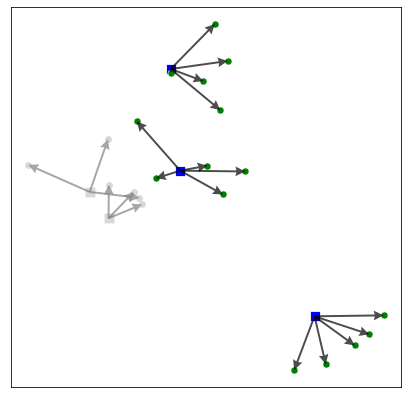

In [229]:
x_Tx_known, y_Tx_known = uniform_distribution_in_circle(0,0, radius=Tx_radius, n=num_Tx_known)
x_Rx_known_list = []
y_Rx_known_list = []
for x, y in zip(x_Tx_known, y_Tx_known):
    xx, yy = uniform_distribution_in_circle(x,y, radius=Rx_radius, n=num_Rx_per_Tx_known)
    x_Rx_known_list.append(xx)
    y_Rx_known_list.append(yy)
x_Rx_known = np.concatenate(x_Rx_known_list)
y_Rx_known = np.concatenate(y_Rx_known_list)

x_Tx_unknown, y_Tx_unknown = uniform_distribution_in_circle(0,0, radius=Tx_radius, n=num_Tx_unknown)
x_Rx_unknown_list = []
y_Rx_unknown_list = []
for x, y in zip(x_Tx_unknown, y_Tx_unknown):
    xx, yy = uniform_distribution_in_circle(x,y, radius=Rx_radius, n=num_Rx_per_Tx_unknown)
    x_Rx_unknown_list.append(xx)
    y_Rx_unknown_list.append(yy)
x_Rx_unknown = np.concatenate(x_Rx_unknown_list)
y_Rx_unknown = np.concatenate(y_Rx_unknown_list)

fig, ax = plt.subplots(1,1,figsize=(7,7));
sns.scatterplot(x_Tx_known, y_Tx_known, color='b', marker='s', s=100, ax=ax);
sns.scatterplot(x_Tx_unknown, y_Tx_unknown, color='grey', marker='s', s=100, alpha=0.3, ax=ax);

sns.scatterplot(x_Rx_known, y_Rx_known, color='g', marker='o', s=50, ax=ax);
sns.scatterplot(x_Rx_unknown, y_Rx_unknown, color='grey', marker='o', s=50, alpha=0.3, ax=ax);

for k in range(num_Tx_known):
    for j in range(num_Rx_per_Tx_known):
        x = x_Tx_known[k]
        y = y_Tx_known[k]
        u = x_Rx_known_list[k][j]
        v = y_Rx_known_list[k][j]
        ax.quiver(
            x, y, u-x, v-y, 
            scale_units='xy', 
            angles='xy',
            scale=1, 
            width=0.005,
            headlength=5, 
            headwidth=5,
            color='black', alpha=0.7);

for k in range(num_Tx_unknown):
    for j in range(num_Rx_per_Tx_unknown):
        x = x_Tx_unknown[k]
        y = y_Tx_unknown[k]
        u = x_Rx_unknown_list[k][j]
        v = y_Rx_unknown_list[k][j]
        ax.quiver(
            x, y, u-x, v-y, 
            scale_units='xy', 
            angles='xy',
            scale=1, 
            width=0.005,
            headlength=5, 
            headwidth=5,
            color='grey', alpha=0.7);

# ax.axis('off');
ax.set_xticks([]);
ax.set_yticks([]);


array([-29.76913432, -29.55565324, -17.76268507,  -3.82608601,
        10.2305919 ,   0.98059292])

In [127]:
np.diff(x_Rx_unknown)

array([ 0.21348108, 11.79296817, 13.93659906, 14.0566779 , -9.24999898])